### Introduction to Neural Networks in Tensorflow

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)


2.13.0


### Creating data to view and fit

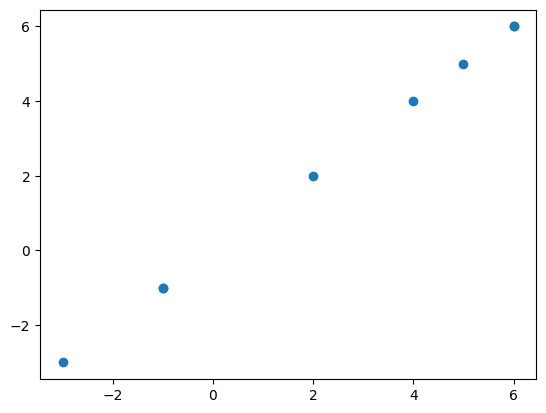

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Create labels
y = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Visualize it
plt.scatter(X, y)

### Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
 # Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>)

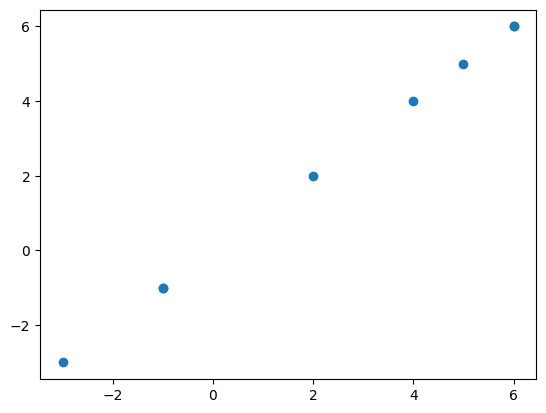

In [5]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** -letting the model try to find patterns between X and y (features and labels)

In [6]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae isshort for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 259ms/step - loss: 6.8161 - mae: 6.8161
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 6.6930 - mae: 6.6930
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 6.5698 - mae: 6.5698
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 6.4467 - mae: 6.4467
Epoch 5/5
1/1 [==============================] - 0s 0s/step - loss: 6.3236 - mae: 6.3236


In [7]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 62ms/step


array([[-13.11925]], dtype=float32)

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

### Improving our model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [8]:
# Let's rebuild the model with epochs=100
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae isshort for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 201ms/step - loss: 4.3529 - mae: 4.3529
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 4.2298 - mae: 4.2298
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 4.1067 - mae: 4.1067
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 3.9835 - mae: 3.9835
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 3.8604 - mae: 3.8604
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7373 - mae: 3.7373
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 3.6142 - mae: 3.6142
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 3.4910 - mae: 3.4910
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 3.3679 - mae: 3.3679
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 3.2448 - mae: 3.2448
Epoch 11/100
1/1 [==============================] - 0s 0s/step - loss: 3.1217 

In [9]:
# Let's see if our model's prediction has improved
y_pred2 = model.predict([17.0])
y_pred2

1/1 [==============================] - 0s 50ms/step


array([[17.422298]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

### Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [10]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [11]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

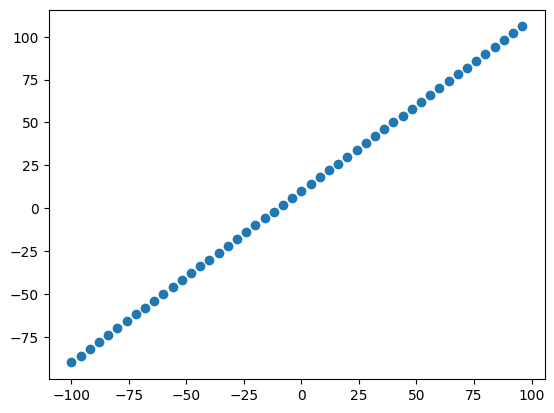

In [12]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [13]:
# Check how many samples we have
len(X)

50

In [14]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

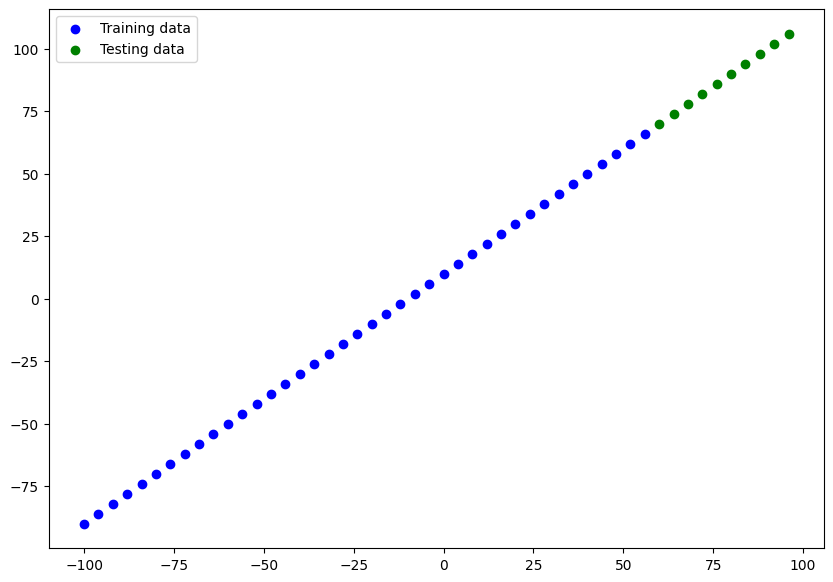

In [15]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend()

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea. 

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [17]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [20]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [21]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [23]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 24ms/step


In [24]:
y_preds

array([[56.4561  ],
       [60.135963],
       [63.815826],
       [67.49569 ],
       [71.17556 ],
       [74.85542 ],
       [78.535286],
       [82.21516 ],
       [85.89502 ],
       [89.57488 ]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [26]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

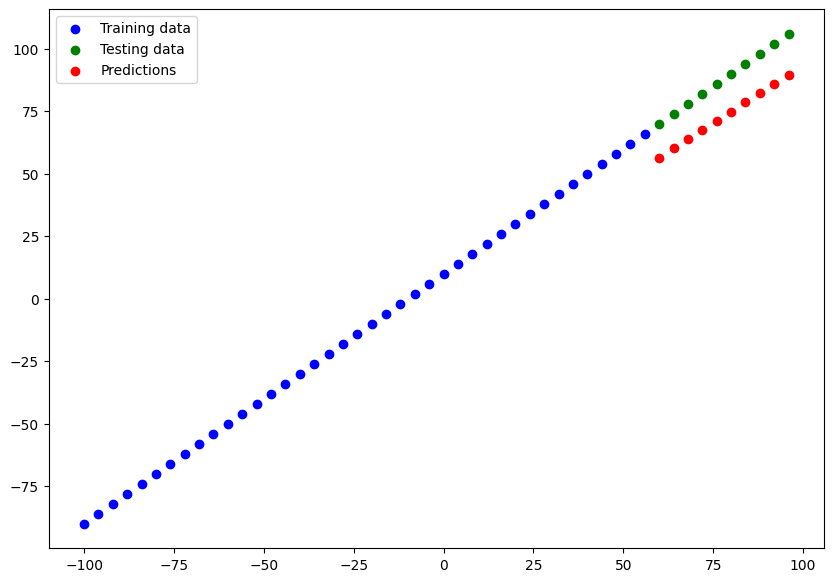

In [27]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongside visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [28]:
# Evaluate the model on the test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 70ms/step - loss: 14.9845 - mae: 14.9845


[14.984509468078613, 14.984509468078613]

In [29]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test,tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.984509>

In [30]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_test,tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=225.38106>

In [31]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    """
  Calculuates mean absolute error between y_test and y_preds.
  """
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
    """
  Calculates mean squared error between y_test and y_preds.
  """
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model to the training data
model1.fit(X_train, y_train, epochs=100, verbose=2) # verbose controls how much gets output

Epoch 1/100
2/2 - 0s - loss: 85.5143 - mae: 85.5143 - 162ms/epoch - 81ms/step
Epoch 2/100
2/2 - 0s - loss: 50.0588 - mae: 50.0588 - 0s/epoch - 0s/step
Epoch 3/100
2/2 - 0s - loss: 15.2176 - mae: 15.2176 - 0s/epoch - 0s/step
Epoch 4/100
2/2 - 0s - loss: 7.9647 - mae: 7.9647 - 0s/epoch - 0s/step
Epoch 5/100
2/2 - 0s - loss: 10.2618 - mae: 10.2618 - 16ms/epoch - 8ms/step
Epoch 6/100
2/2 - 0s - loss: 9.5171 - mae: 9.5171 - 1ms/epoch - 503us/step
Epoch 7/100
2/2 - 0s - loss: 8.6464 - mae: 8.6464 - 0s/epoch - 0s/step
Epoch 8/100
2/2 - 0s - loss: 9.0750 - mae: 9.0750 - 0s/epoch - 0s/step
Epoch 9/100
2/2 - 0s - loss: 18.8941 - mae: 18.8941 - 0s/epoch - 0s/step
Epoch 10/100
2/2 - 0s - loss: 10.2117 - mae: 10.2117 - 0s/epoch - 0s/step
Epoch 11/100
2/2 - 0s - loss: 8.4515 - mae: 8.4515 - 0s/epoch - 0s/step
Epoch 12/100
2/2 - 0s - loss: 10.7469 - mae: 10.7469 - 0s/epoch - 0s/step
Epoch 13/100
2/2 - 0s - loss: 9.8467 - mae: 9.8467 - 0s/epoch - 0s/step
Epoch 14/100
2/2 - 0s - loss: 16.1583 - mae: 16

1/1 [==============================] - 0s 36ms/step


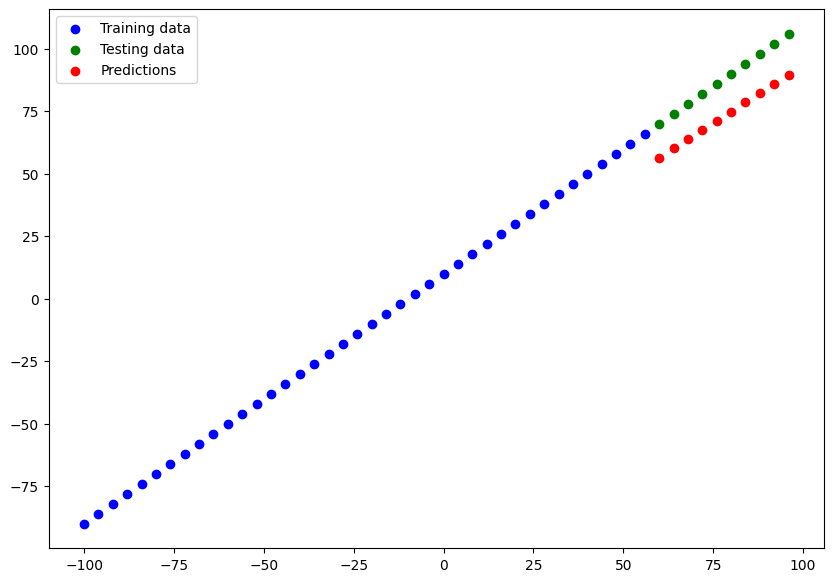

In [33]:
# Make and plot predictions for model_1
y_preds_1 = model1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [34]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze())
mse_1 = mse(y_test, y_preds_1.squeeze())
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.973694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.05594>)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [35]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1]),
  tf.keras.layers.Dense(1,input_shape=[1]) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=2) # set verbose to 0 for less output

Epoch 1/100
2/2 - 0s - loss: 11.6904 - mae: 11.6904 - 215ms/epoch - 107ms/step
Epoch 2/100
2/2 - 0s - loss: 14.1741 - mae: 14.1741 - 0s/epoch - 0s/step
Epoch 3/100
2/2 - 0s - loss: 25.5849 - mae: 25.5849 - 0s/epoch - 0s/step
Epoch 4/100
2/2 - 0s - loss: 13.1361 - mae: 13.1361 - 0s/epoch - 0s/step
Epoch 5/100
2/2 - 0s - loss: 14.4898 - mae: 14.4898 - 16ms/epoch - 8ms/step
Epoch 6/100
2/2 - 0s - loss: 11.5655 - mae: 11.5655 - 0s/epoch - 0s/step
Epoch 7/100
2/2 - 0s - loss: 12.6201 - mae: 12.6201 - 0s/epoch - 0s/step
Epoch 8/100
2/2 - 0s - loss: 11.0264 - mae: 11.0264 - 0s/epoch - 0s/step
Epoch 9/100
2/2 - 0s - loss: 39.5730 - mae: 39.5730 - 16ms/epoch - 8ms/step
Epoch 10/100
2/2 - 0s - loss: 27.0788 - mae: 27.0788 - 0s/epoch - 0s/step
Epoch 11/100
2/2 - 0s - loss: 11.0331 - mae: 11.0331 - 0s/epoch - 0s/step
Epoch 12/100
2/2 - 0s - loss: 24.4545 - mae: 24.4545 - 0s/epoch - 0s/step
Epoch 13/100
2/2 - 0s - loss: 19.2123 - mae: 19.2123 - 0s/epoch - 0s/step
Epoch 14/100
2/2 - 0s - loss: 23.41

1/1 [==============================] - 0s 34ms/step


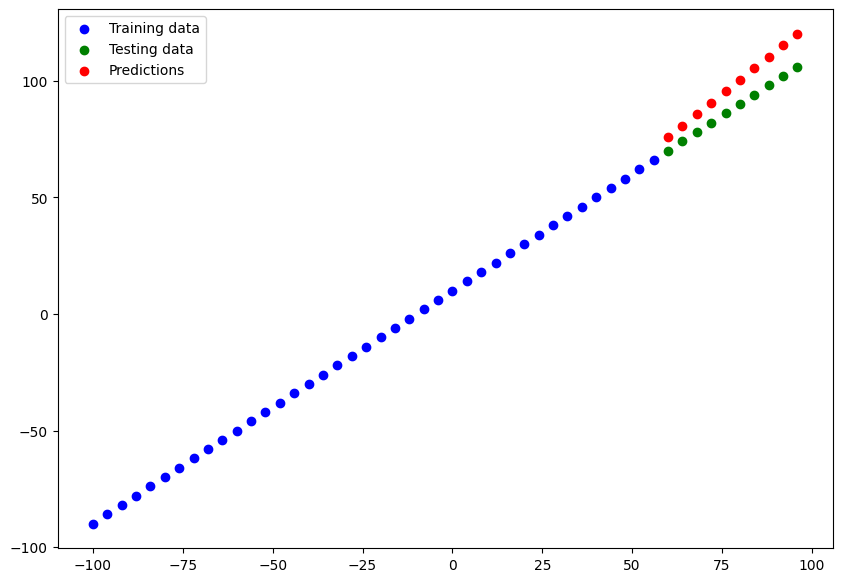

In [36]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [37]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(9.957552, 106.36589)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [38]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 34ms/step


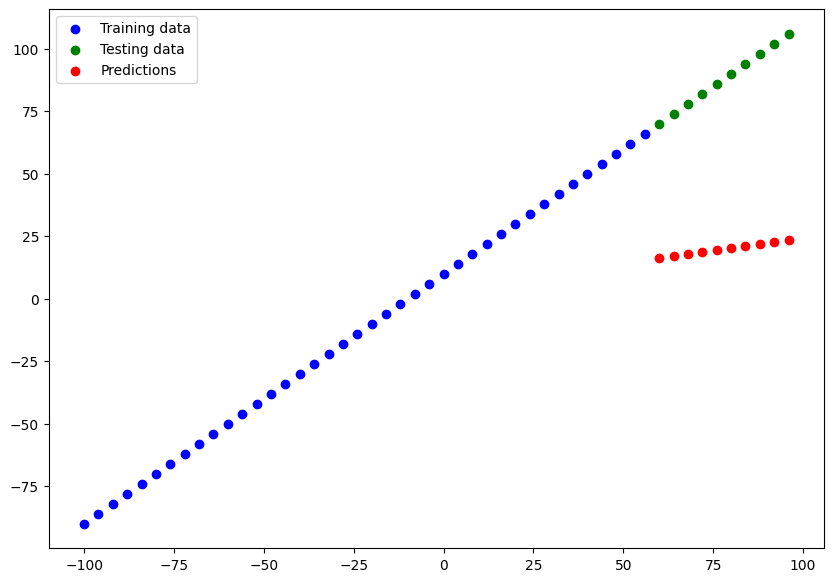

In [39]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [40]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.895164, 4694.1807)